In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix,classification_report

from sklearn.metrics import recall_score , accuracy_score ,precision_score,f1_score,roc_auc_score

from sklearn.metrics import confusion_matrix,classification_report
from imblearn.metrics import sensitivity_specificity_support
from imblearn.metrics import sensitivity_score ,specificity_score
from sklearn.metrics import recall_score , accuracy_score ,precision_score,f1_score,roc_auc_score
import statsmodels.api as sms
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,precision_score

In [9]:
data=pd.read_csv('before_loan_cleaned_data.csv',parse_dates=['issue_d','earliest_cr_line'])

In [10]:
dataloan=data.copy()

In [11]:
data.drop('Unnamed: 0',inplace=True,axis=1)


### We can also drop issue month,issue date and issue year as our testing data is only og 1 year so it wont make any difference


In [12]:
data.drop(['issue_d','issue_month','issue_year'],axis=1, inplace=True)

In [13]:
numerical_vars = list(data.select_dtypes(exclude='object').columns)

In [14]:
numerical_vars

['loan_amnt',
 'int_rate',
 'emp_length',
 'annual_inc',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util']

In [15]:
data['loan_status']=np.where(data['loan_status']=='Charged Off',1,0)

In [16]:
lab= LabelEncoder()
col_count=0
for i in data:
    if data[i].dtype=='O' and data[i].nunique()<=2:
        if data[i].isnull().any()==False:
            lab.fit(data[i])
            data[i]=lab.transform(data[i])
            print(i)
            col_count+=1
            
print("total_columns updated",col_count)

term
initial_list_status
total_columns updated 2


### Here we have Grade and Subgrade but we know subgrade is further division of grade so we can remove grade column and just keep the subgrade

In [17]:
data.drop('grade',axis=1,inplace=True)

In [18]:
data=pd.get_dummies(data)

In [19]:
y=data['loan_status']
X=data.drop('loan_status',axis=1)

In [20]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       ...
       'addr_state_SD', 'addr_state_TN', 'addr_state_TX', 'addr_state_UT',
       'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI',
       'addr_state_WV', 'addr_state_WY'],
      dtype='object', length=118)

In [21]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25 , random_state=50)

In [22]:
for i in numerical_vars:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

D:\Installation\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Installation\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Installation\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [23]:
X_train

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
8627,2.631968,0,0.048673,-0.560906,-0.003047,0.326738,0.690230,0.012901,-0.329319,0.418897,...,0,0,0,0,0,0,0,0,0,0
23348,-0.684502,0,-1.506137,-0.560906,-0.369070,-1.064869,0.785533,-0.805951,-0.329319,-0.443137,...,0,0,0,0,0,0,0,0,0,0
78898,-1.347796,0,1.349266,0.023369,-0.630515,2.072991,-2.139422,0.012901,-0.329319,-0.131567,...,0,0,1,0,0,0,0,0,0,0
18933,-0.193173,1,-0.605028,-1.145182,-0.123965,-0.534182,0.236466,0.422327,-0.329319,-0.030434,...,0,0,0,0,0,0,0,0,0,0
202580,-0.653794,0,0.416380,-0.560906,-0.565154,-0.063889,-0.229064,-0.191812,1.962558,-0.645720,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179489,-0.316005,0,-1.381298,-1.437319,0.039438,-0.680667,0.989079,2.060031,-0.329319,-0.047140,...,0,0,0,0,0,0,0,0,0,0
153709,0.175324,0,-1.333633,0.023369,-0.287368,-0.156406,0.642383,-0.396525,-0.329319,-0.093886,...,0,0,0,0,0,0,0,0,0,0
239499,-1.077565,0,-0.246401,-0.853044,-0.695876,0.546465,1.442059,-0.396525,-0.329319,-0.429962,...,0,0,0,0,0,0,0,0,0,0
103904,-0.782768,0,0.570726,1.191920,-0.009583,-0.385127,-0.789896,-1.010664,-0.329319,-0.427221,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_train.shape

(189589, 118)

In [25]:
X_test.shape

(63197, 118)

In [26]:
y_train.shape

(189589,)

In [27]:
sm = SMOTE(random_state=12)

In [28]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [93]:


def model_selection(model,model_name,X_train,X_test,y_train,y_test):
    cols=['model', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']
    model_report = pd.DataFrame(columns = cols)
    algo=model
    algo.fit(X_train,y_train)
    algo_predict=algo.predict(X_test)
    cm_algo = confusion_matrix(y_test, algo_predict)
    algo_acc = accuracy_score(y_test, algo_predict)
    y_score = algo.predict_proba(X_test)[:,1]
    print("Model :" ,model_name)
    print('Validation Results')
    print("Recall score ",recall_score(y_test, algo_predict))
    print("F1 score",f1_score(y_test, algo_predict))
    print("roc auc score",roc_auc_score(y_test, y_score))
    print("Precision Score",precision_score(y_test, algo_predict))
    print("Accuracy score : ",algo_acc)
    model_ser=pd.Series({'model':model_name , 'roc_auc_score':roc_auc_score(y_test, y_score),
                         'precision_score':precision_score(y_test, algo_predict),
                         'recall_score':recall_score(y_test, algo_predict),
                         'f1_score':f1_score(y_test, algo_predict)})
    model_report = model_report.append(model_ser, ignore_index = True)
    fpr, tpr, thresholds = roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
    sns.heatmap(cm_algo,annot=True)
    
    return model_report ,fpr, tpr, thresholds
    

In [68]:
print("Using LogisticRegression c 0.002")
logistic_report,fpr_log, tpr_log, thresholds_log=model_selection(LogisticRegression(C = 0.002, penalty='l1',solver = "liblinear"),'LogisticRegression',X_train_res, X_test, y_train_res, y_test)

Using LogisticRegression c 0.002
Model : LogisticRegression
Validation Results
Recall score  0.40972098809312246
F1 score 0.35318448163609206
roc auc score 0.6724779630811633
Precision Score 0.3103587534495524
Accuracy score :  0.7327563017231831


In [69]:
logistic_report

,model,roc_auc_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.672478,0.310359,0.409721,0.353184


In [72]:
print("Using RandomForestClassifier()")
RandomForest_report,fpr_ran, tpr_ran, thresholds_ran=model_selection(RandomForestClassifier(),'RandomForestClassifier',X_train_res, X_test, y_train_res, y_test)

Using RandomForestClassifier()
Model : RandomForestClassifier
Validation Results
Recall score  0.23458325928558735
F1 score 0.2827309236947791
roc auc score 0.6824093503254024
Precision Score 0.3557472038808786
Accuracy score :  0.7880437362533032


In [82]:
RandomForest_report

,model,roc_auc_score,precision_score,recall_score,f1_score
0,RandomForestClassifier,0.682409,0.355747,0.234583,0.282731


In [81]:
print("Using GradientBoostingClassifier()")
GradientBoosting_report2,fpr_gb, tpr_gb, thresholds_gb=model_selection(GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),'GradientBoostingClassifier',X_train_res, X_test, y_train_res, y_test)

Using GradientBoostingClassifier()
Model : GradientBoostingClassifier
Validation Results
Recall score  0.39408210414074996
F1 score 0.35534011697780626
roc auc score 0.6846826767133956
Precision Score 0.32353370294718414
Accuracy score :  0.7453676598572717


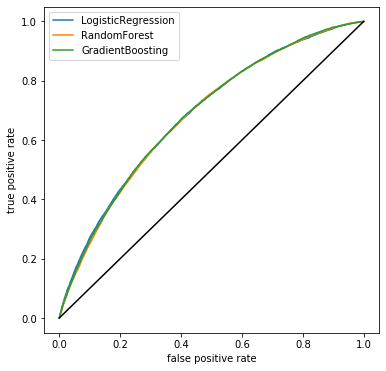

In [92]:
plt.figure(1, figsize=(6,6))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr_log, tpr_log, label = 'LogisticRegression' )
plt.plot(fpr_ran, tpr_ran, label = 'RandomForest')
plt.plot(fpr_gb, tpr_gb, label = 'GradientBoosting' )
plt.plot([0,1],[0,1], color = 'black')
plt.legend()

## Selecting important features by Applyting the same process using SelectFromModel

In [94]:
sel_ = SelectFromModel(LogisticRegression(C=0.002, penalty='l1',solver='liblinear'))
sel_.fit(X_train_res, y_train_res)

SelectFromModel(estimator=LogisticRegression(C=0.002, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

### Visualising features that were kept by the lasso regularisation

##### True is for the features that lasso thought is important (non-zero features) while False is for the features whose weights were shrinked to zero and are not important according to Lasso.

In [95]:
sel_.get_support()

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False])

In [96]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 118
selected features: 81
features with coefficients shrank to zero: 37


In [97]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['term', 'open_acc', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'purpose_educational', 'purpose_house', 'purpose_moving',
       'purpose_renewable_energy', 'purpose_vacation', 'addr_state_AK',
       'addr_state_AR', 'addr_state_DC', 'addr_state_DE', 'addr_state_HI',
       'addr_state_IA', 'addr_state_ID', 'addr_state_ME', 'addr_state_MS',
       'addr_state_MT', 'addr_state_ND', 'addr_state_NE', 'addr_state_NH',
       'addr_state_NM', 'addr_state_RI', 'addr_state_SD', 'addr_state_VT',
       'addr_state_WV', 'addr_state_WY'],
      dtype='object')

In [98]:
selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feats

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'earliest_cr_line', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase', 'purpose_medical',
       'purpose_other', 'purpose_small_business', 'purpose_weddi

### Deleting the unused columns and taking only the columns selected by Lasso

In [99]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((189589, 81), (63197, 81))

### As the sample was imbalanced doing smote transformation to balanced the data

In [100]:
X_train_sel_res, y_train_sel_res = sm.fit_sample(X_train_selected, y_train)

### Applying the selected feature test to Random Forest 

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train_sel_res, y_train_sel_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
print('Validation Results')
print(rf.score(X_test_selected, y_test))
print(recall_score(y_test, rf.predict(X_test_selected)))
print(f1_score(y_test, rf.predict(X_test_selected)))
print(roc_auc_score(y_test, rf.predict(X_test_selected)))
print(precision_score(y_test, rf.predict(X_test_selected)))

Validation Results
0.8062091554978875
0.14270481606539898
0.2077754059124135
0.5463346000508733
0.38192627824019026


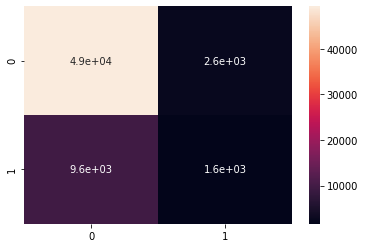

In [103]:
y_predict=rf.predict(X_test_selected)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm , annot=True)

In [104]:
lasso_log = cross_val_score(LogisticRegression(max_iter=2000), X_train_sel_res, y_train_sel_res, scoring = 'accuracy',
                            cv = KFold(5, shuffle = True))

print("Accuracy of Logistic Regression: %.2f"%(np.mean(lasso_log)*100), "%")

Accuracy of Logistic Regression: 65.27 %
